In [1]:
import pandas as pd
import Useful_functions_for_stations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bluebikes_idletime = pd.read_csv('C:/Users/lauri/PycharmProjects/DSML_Data/bluebikes_idle_time.csv')
bluebikes_idletime.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59


In [4]:
bluebikes_stations = pd.read_csv('C:/Users/lauri/PycharmProjects/DSML_Data/bluebikes_stations.csv')
bluebikes_stations.head()

,station_id,lat,lon
0,67,42.358100,-71.093198
1,139,42.361780,-71.108100
2,36,42.349792,-71.077338
3,10,42.350406,-71.108279
4,9,42.351187,-71.115852


Plot station map to show the current station network


In [7]:
Useful_functions_for_stations.map_stations_all_cords(bluebikes_stations)

TypeError: Location should be a sized variable, for example a list or a tuple, instead got 67 of type <class 'int'>.

Bar chart which shows number of trips originating from each station


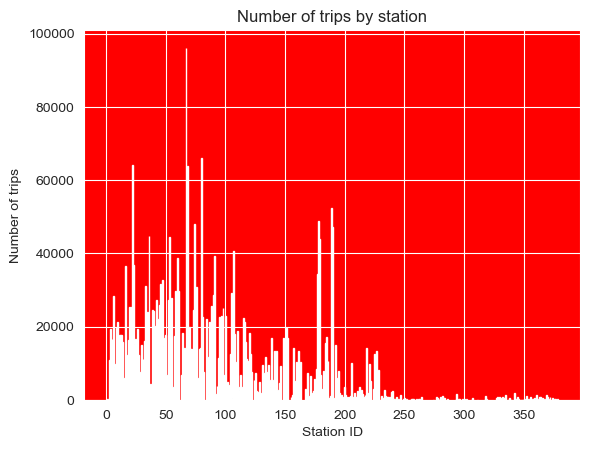

In [12]:
trips_per_station = bluebikes_idletime.groupby('start_station_id').size()
plt.rcParams['axes.facecolor'] = 'red'
plt.bar(trips_per_station.index, trips_per_station.values)
plt.xlabel('Station ID')
plt.ylabel('Number of trips')
plt.title('Number of trips by station')

plt.show()



Bar chart displaying total number of bikes available at each station

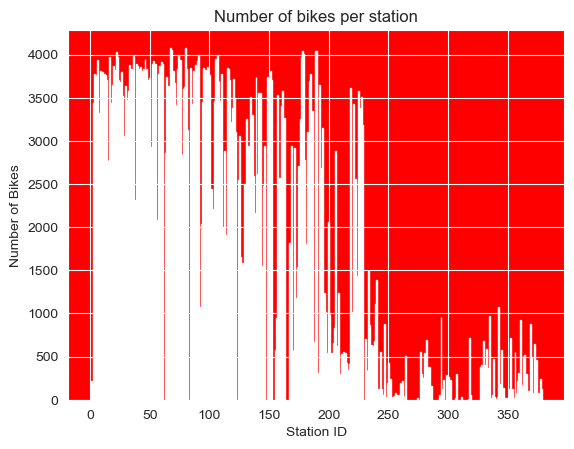

In [13]:
# Calculate number of unique bikes
bikes_per_station = bluebikes_idletime.groupby('start_station_id')['bike_id'].nunique()

plt.bar(bikes_per_station.index, bikes_per_station.values)
plt.xlabel('Station ID')
plt.ylabel('Number of Bikes')
plt.title("Number of bikes per station")
plt.show()

Visualize growth or decline of station usage with an area chart

In [ ]:
bluebikes_idletime['start_time'] = pd.to_datetime(bluebikes_idletime['start_time'])
# Sort the data by the start_time
bluebikes_idletime = bluebikes_idletime.sort_values('start_time')

rentals = bluebikes_idletime['start_time'].value_counts().sort_index().cumsum()

#Create area chart
plt.fill_between(rentals.index, rentals.values)
plt.xlabel("Time")
plt.ylabel("Cumulative bike rentals")
plt.title("Cumulative bike rentals over time")
plt.xticks(rotation = 45)
plt.show()

Error in callback <function flush_figures at 0x00000295835C45E0> (for post_execute):


KeyboardInterrupt: 

Create Heatmap to show utilization of stations at different times of days of the week.

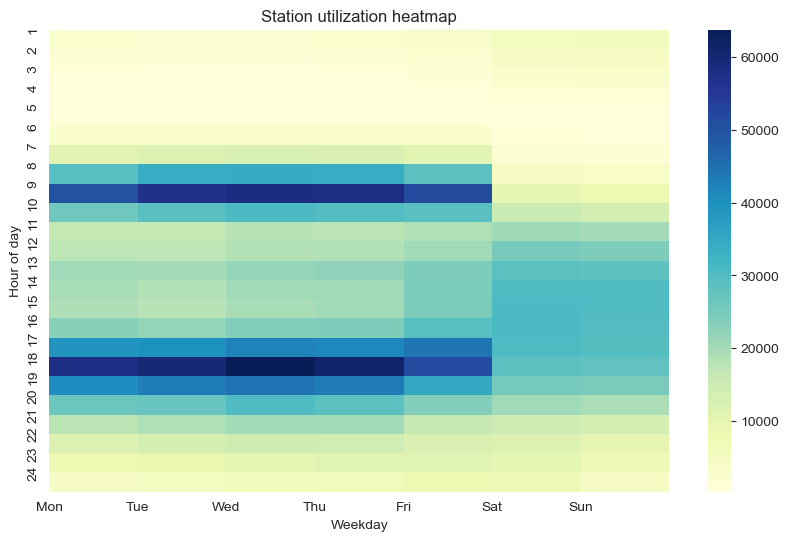

In [7]:
bluebikes_idletime['start_time'] = pd.to_datetime(bluebikes_idletime['start_time'])

bluebikes_idletime['hour'] = bluebikes_idletime['start_time'].dt.hour
bluebikes_idletime['weekday'] = bluebikes_idletime['start_time'].dt.weekday

rentals_by_hour = bluebikes_idletime.groupby(['hour','weekday']).size().unstack()

#heatmap_data = bluebikes_idletime.pivot_table(index='hour', columns='weekday', values='trip_id', aggfunc='count')

plt.figure(figsize=(10,6))
sns.heatmap(rentals_by_hour, cmap='YlGnBu')
plt.xlabel('Weekday')
plt.ylabel('Hour of day')
plt.title('Station utilization heatmap')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(range(24), range(1,25))
plt.show()

Scatter plot to compare number of rentals against number of returns of each station

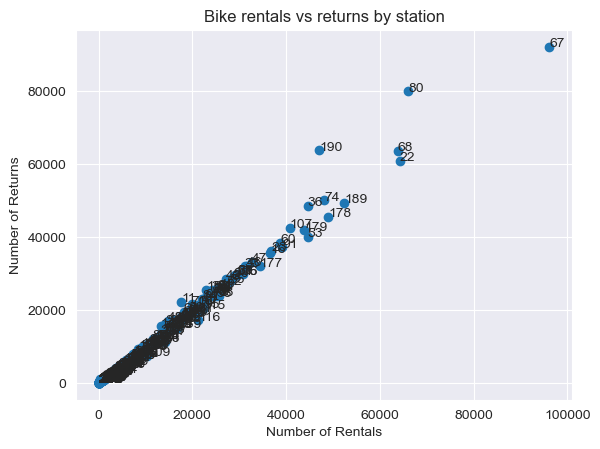

In [10]:
rentals_per_station = bluebikes_idletime.groupby('start_station_id').size().reset_index(name='rentals')

# Group by end_station_id and calculate the number of returns
returns_per_station = bluebikes_idletime.groupby('end_station_id').size().reset_index(name='returns')

# Merge the rentals and returns data based on station ID
rentals_returns_per_station = pd.merge(rentals_per_station, returns_per_station, left_on='start_station_id', right_on='end_station_id')

# Create the scatter plot
plt.scatter(rentals_returns_per_station['rentals'], rentals_returns_per_station['returns'])
plt.xlabel('Number of Rentals')
plt.ylabel('Number of Returns')
plt.title("Bike rentals vs returns by station")

# Add the station_id to the points in the plot
for i, station_id in enumerate(rentals_returns_per_station['start_station_id']):
    plt.annotate(station_id, (rentals_returns_per_station.loc[i, 'rentals'], rentals_returns_per_station.loc[i, 'returns']))
plt.show()